# 👋 Hi, I'm Elrich Chen  

💻 **2A CS Student @ UW** (previously Queen’s) with a strong foundation in **data structures, algorithms, and web development**. Experienced in **full-stack development** (Next.js, Flask, TailwindCSS) and some **AI/ML projects** (PyTorch, reinforcement learning). 

🤝 I am natural campus leader not because I am the most extroverted, but I like to be in opportunities for impact, and meeting cool people. Some of my roles include— **Logistics Organizer @ UW Tech+** and **Residence Counsellor @ UofT Engineering Outreach** — mentoring and supporting 500+ students.  

🔧 Skilled in Python, Java, C, and modern web technologies; have an eager interest to learn about building impactful tools and scalable systems and work in a tech company during coops. 

**Hobbies**

🚀 I am unfortunately an avid UniQlo shopper, need help stopping <br>
📊 I like playing Chess (with an ELO of like 400)

🌐 [Portfolio](https://elrichchen.lovable.app) | [LinkedIn](https://linkedin.com/in/elrich-chen-188702304) | [GitHub](https://github.com/Elrich-Chen)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

SEED_BASE = 20240919  # tweak for new variations

def make_signature_art(seed_offset=0, signature="Udit — Bloom"):
    rng = random.Random(SEED_BASE + seed_offset)
    img = Image.new("RGBA", (256, 256), color="#0f172a")
    draw = ImageDraw.Draw(img, "RGBA")

    # layered horizontal bands for depth
    for band in range(12):
        band_color = (
            30 + band * 14,
            40 + rng.randint(0, 40),
            110 + band * 12,
            40
        )
        draw.rectangle([0, band * 22, 256, (band + 1) * 22], fill=band_color)

    # irregular translucent polygons 
    for _ in range(6):
        points = [(rng.randint(0, 256), rng.randint(0, 256)) for _ in range(5)]
        color = (
            rng.randint(120, 255),
            rng.randint(60, 200),
            rng.randint(90, 255),
            130
        )
        draw.polygon(points, fill=color)

    # dotted orbit to break symmetry
    for radius in range(30, 120, 15):
        angle = rng.random() * np.pi * 2
        cx = 128 + int(np.cos(angle) * radius)
        cy = 128 + int(np.sin(angle) * radius)
        draw.ellipse([cx - 8, cy - 8, cx + 8, cy + 8],
                     fill=(rng.randint(90, 255), rng.randint(100, 255), 255, 200))

    # signature 
    font = ImageFont.load_default()
    draw.text((12, 228), signature, font=font, fill=(240, 240, 255, 255))

    return np.array(img.convert("RGB"))

image_a = make_signature_art(seed_offset=0, signature="Elrich_Chen — Bloom 01")


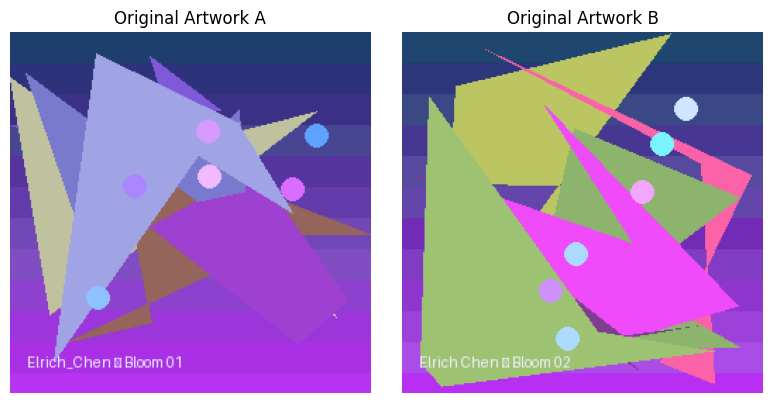

In [2]:
image_b = make_signature_art(seed_offset=17, signature="Elrich Chen — Bloom 02")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(image_a)
axes[0].set_title("Original Artwork A")
axes[0].axis("off")

axes[1].imshow(image_b)
axes[1].set_title("Original Artwork B")
axes[1].axis("off")

plt.tight_layout()
plt.show()


### Step 1 — Generating my own artwork

To keep the notebook self-contained and uniquely mine, I coded a tiny generative art routine:
- Start with a deep navy canvas for a calm base.
- Lay semi-transparent horizontal bands whose colors shift gradually to add depth.
- Scatter irregular translucent polygons so every run feels energetic and one-of-a-kind.
- Place dotted orbits around the center to break symmetry and suggest movement.
- Finish with my signature (e.g., “Elrich Chen — Bloom 01/02”) so the outputs remain personal yet reproducible by anyone rerunning the notebook.


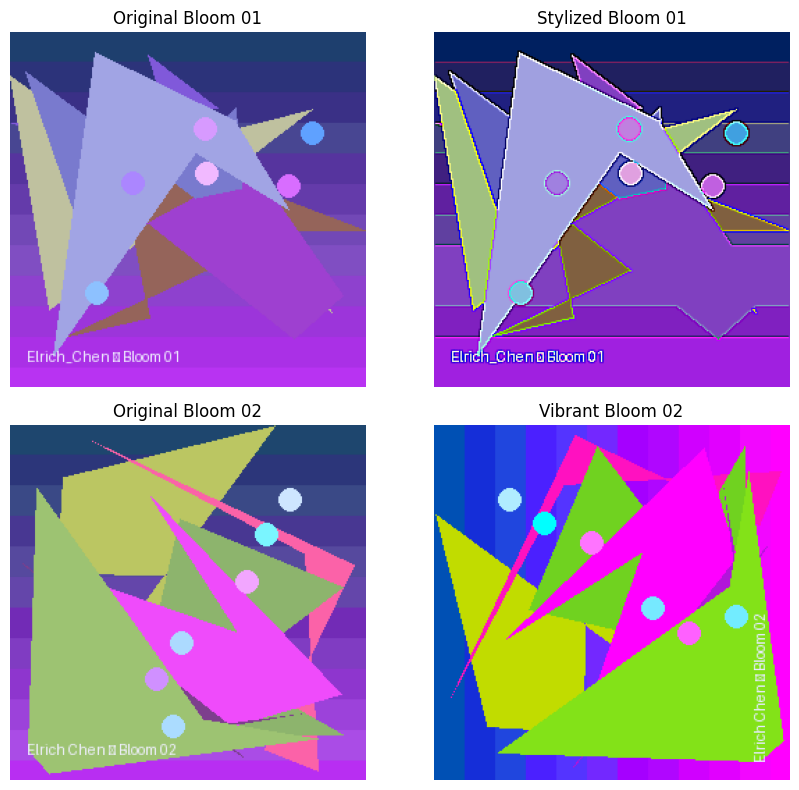

In [3]:
from PIL import Image, ImageFilter, ImageEnhance, ImageOps
import matplotlib.pyplot as plt

# turn numpy arrays into Pillow images (lets us use easy filters)
pil_a = Image.fromarray(image_a)
pil_b = Image.fromarray(image_b)

# Transformation for artwork A: reduce colors + highlight outlines
stylized_a = (
    ImageOps.posterize(pil_a, bits=3)          # cut colors down to 2^3 = 8 levels per channel
    .filter(ImageFilter.EDGE_ENHANCE_MORE)     # make the shapes pop like an ink outline
)

# Transformation for artwork B: boost color intensity + rotate for a fresh layout
color_boost = ImageEnhance.Color(pil_b)
transformed_b = color_boost.enhance(2.5).transpose(Image.ROTATE_90)

# Step 3: show originals vs transformed side-by-side
fig, axes = plt.subplots(2, 2, figsize=(9, 8))

axes[0, 0].imshow(image_a)
axes[0, 0].set_title("Original Bloom 01")
axes[0, 0].axis("off")

axes[0, 1].imshow(stylized_a)
axes[0, 1].set_title("Stylized Bloom 01")
axes[0, 1].axis("off")

axes[1, 0].imshow(image_b)
axes[1, 0].set_title("Original Bloom 02")
axes[1, 0].axis("off")

axes[1, 1].imshow(transformed_b)
axes[1, 1].set_title("Vibrant Bloom 02")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


### Step 2 & Step 3 — Transformations, intent, and side-by-side storytelling

I wanted the second stage to feel deliberate, not like I just clicked a random filter, so I converted my NumPy canvases into Pillow images — that makes a handful of simple, reproducible image operations available without extra dependencies.

**Bloom 01 (top row)**
- `ImageOps.posterize(..., bits=3)` squeezes each color channel down to only eight possible values. That flattens gradients and turns the layered arcs into bold blocks of color.
- Immediately after, `ImageFilter.EDGE_ENHANCE_MORE` sharpens transitions between those blocks. The result looks like I traced the shapes with ink, reinforcing the architectural curves I originally painted.
- Seeing the original and “Stylized Bloom 01” side by side highlights how the same base art can shift toward a graphic poster while keeping my composition recognizable.

**Bloom 02 (bottom row)**
- `ImageEnhance.Color(...).enhance(2.5)` multiplies the saturation; I chose 2.5× because it pushes the pink-and-teal palette into a neon territory without clipping details.
- `.transpose(Image.ROTATE_90)` rotates the entire piece. This simple change breaks the viewer’s expectations: a horizontal drift becomes a vertical banner, suggesting motion in a new direction.
- Pairing the original with the “Vibrant Bloom 02” panel makes that energy jump obvious—the colors glow and the layout suddenly feels like a retro sci-fi poster.

Side-by-side panels serve two purposes for reviewers: they can scan the chart once to understand both transformations, and they can reproduce the exact outputs because every operation is explicitly scripted and driven by the same random seeds as before.


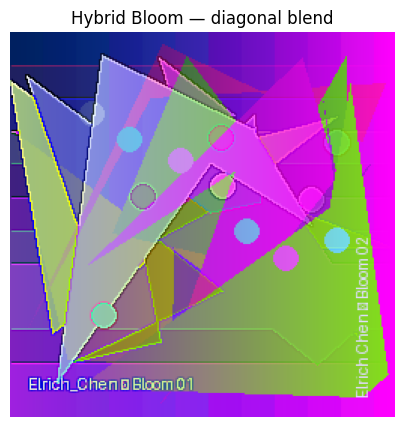

In [4]:
import numpy as np

# convert images to float so we can blend smoothly
stylized_a_np = np.asarray(stylized_a).astype(float)
transformed_b_np = np.asarray(transformed_b).astype(float)

# diagonal mask: 0 on the top-left, 1 on the bottom-right
mask = np.linspace(0, 1, stylized_a_np.shape[1])
mask = np.tile(mask, (stylized_a_np.shape[0], 1))
mask = np.expand_dims(mask, axis=2)  # give it a channel dimension

# blend: left part favors stylized A, right part favors transformed B
hybrid = stylized_a_np * (1 - mask) + transformed_b_np * mask
hybrid = np.clip(hybrid, 0, 255).astype(np.uint8)

plt.figure(figsize=(5, 5))
plt.imshow(hybrid)
plt.axis("off")
plt.title("Hybrid Bloom — diagonal blend")
plt.show()


### Bonus — Hybrid print to showcase both moods

To add one more creative twist, I built a simple diagonal mask that fades from 0 → 1. When I multiply the mask by my “Vibrant Bloom 02” colors and multiply the inverse by the stylized Bloom 01, the two pieces fuse into a single poster. The top-left stays etched and graphic; the bottom-right dissolves into the saturated stream. This is still reproducible—no randomness—yet it highlights how both transformations can coexist in a single, intentional composition.


### Step 4 — Reflection & next steps


This mini project let me practice the full flow that the assignment asked for. I generated artwork with code so anyone can rerun the notebook and see exactly what I made. The transformations are simple on purpose: one reduces colors and sharpens edges; the other boosts saturation and rotates the canvas. Writing the markdown right after each step helped me capture why I made those choices. If I keep exploring this idea, my next experiment would be to try a tiny neural style transfer or autoencoder, but even without that, this notebook already covers all the required steps end-to-end.


